# Basic Linear Regression using Gradient Descent

In [28]:
"""
cd .\09linear_regression_i_gradientD\
jupyter nbconvert --to markdown lnrGD.ipynb --output README.md

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')


## Gradient Descent Algorithm

In [29]:
M= np.arange(10)
Cost=(M-5)**2
print(Cost,M)

[25 16  9  4  1  0  1  4  9 16] [0 1 2 3 4 5 6 7 8 9]


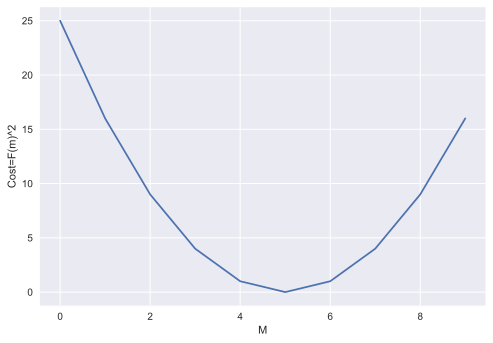

In [30]:
plt.style.use("seaborn")
plt.plot(M, Cost)
plt.ylabel("Cost=F(m)^2")
plt.xlabel("M")
plt.show()

In [35]:
# start with a random guess
m = 0
# learning rate
lr = 0.1
# repeat 50 times in the downhill direction
m_list = []

def slope(m):
	return 2 * (m - 5)

for i in range(50):
	# update the guess
	m = m - lr * slope(m)
	# plot the current guess
	m_list.append(m)
	
print(m_list[-10:])


[4.999468308801686, 4.9995746470413485, 4.999659717633079, 4.9997277741064625, 4.99978221928517, 4.999825775428136, 4.999860620342509, 4.999888496274007, 4.999910797019206, 4.999928637615365]


We know `(m-5)^2=0` => `m=5` , that means we are approaching the minimum of the cost function.

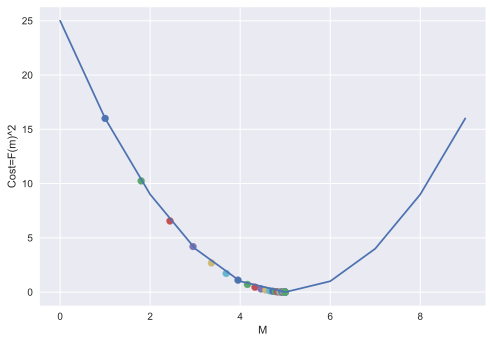

In [36]:
plt.plot(M,Cost)
plt.ylabel("Cost=F(m)^2")
plt.xlabel("M")
m = 0
lr = 0.1


def slope(m):
	return 2 * (m - 5)
	
for i in range(50):
	m = m - lr * slope(m)
	
	# cost at x=m
	cost = (m-5)**2
	plt.scatter(m, cost)



## Prepare Data

In [4]:
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
X = data.iloc[:, 1].values.reshape(-1, 1)
y = data.iloc[:, 2].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Type of X:", type(X))
print("Type of y:", type(y))


Shape of X: (10000, 1)
Shape of y: (10000,)
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


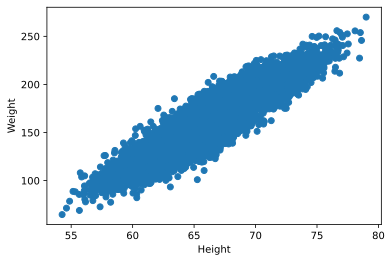

In [7]:
plt.scatter(X, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Normalization 

<div align="center">
<img src="img/a.jpg" alt="a.jpg" width="800px">
</div>

Because of the large range of the data, we need to normalize the data. Values of `X` are not in the same scale and Squaring such large value will no be efficient.

Normalization in machine learning is the process of translating data into the range `[0, 1]` (or any other range) or simply transforming data onto the unit sphere. Every dataset does not need to be normalized for machine learning. It is only required when the ranges of characteristics are different.

The most widely used types of normalization in machine learning are:

- scaling to a range
- clipping
- log scaling
- z-score

[Normalization Techniques at a Glance](https://developers.google.com/machine-learning/data-prep/transform/normalization)

> Z-Score

`Z-score` is a variation of scaling that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have `mean = 0` and `std = 1`. It’s useful when there are a few outliers, but not so extreme that you need clipping.


<div align="center">
<img src="img/z-score-1.jpg" alt="z-score-1.jpg" width="600px">
</div>


The formula for calculating the z-score of a point, `x`, is as follows:

`Z Score x'= (x – μ) / ơ`

where
- `x` = Datapoint
- `μ` = Mean
- `ơ` = Standard deviation

Z-Score Calculation:

<div align="center">
<img src="img/z-score.jpg" alt="z-score.jpg" width="700px">
</div>

[More-Details](https://www.wallstreetmojo.com/z-score-formula/)

In [14]:
u = X.mean()
std = X.std()
X_normalized = (X - u) / std
print(X_normalized[:5])


[[1.94406149]
 [0.62753668]
 [2.01244346]
 [1.39406046]
 [0.9134207 ]]


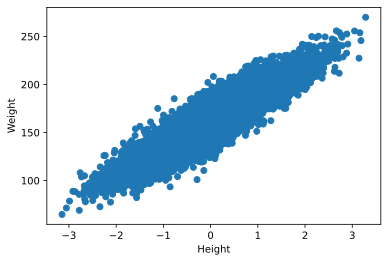

In [15]:
plt.scatter(X_normalized, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()


### Train and Test Split

In [54]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_normalized, y)
X_train.shape


(7500, 1)

## Gradient Descent Update Rule for Regression

In [56]:
def hypothesis(x,theta):
	y_ = theta[0] + theta[1] * x
	return y_


def costError(X, Y, theta):
	N = X.shape[0]
	cost = 0
	for i in range(N):
		cost += (hypothesis(X[i], theta) - Y[i])**2

	cost = cost / (N)
	return cost
	
	
def gradient(X,Y,theta):
	N = X.shape[0]
	grad = np.zeros((2,))
	
	for i in range(N):
		grad[0] += (hypothesis(X[i],theta) - Y[i])
		grad[1] += (hypothesis(X[i],theta) - Y[i]) * X[i]
	
	grad = grad / N
	return grad
	
	
def GradientDescent(X,Y,max_step=100,learning_rate=0.1):

	theta = np.zeros((2,))
	cost_error = []
	for i in range(max_step):
		# compute the gradient
		grad = gradient(X,Y,theta)
		# also error
		e = costError(X,Y,theta)
		cost_error.append(e)
		# update theta
		theta[0] = theta[0] - learning_rate * grad[0]
		theta[1] = theta[1] - learning_rate * grad[1]
	
	return theta, cost_error


In [57]:
theta, cost_error = GradientDescent(X_train, y_train)


In [58]:
theta

array([161.49121284,  29.67841874])

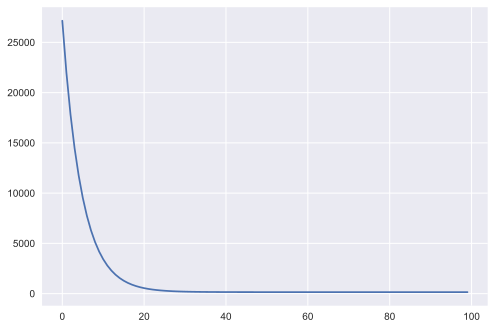

In [59]:
plt.plot(cost_error)

## Prediction

In [60]:
X_test[0]

array([-0.36043377])

In [61]:
y_test[0]

151.449737418287

In [64]:
y_test_pred = hypothesis(X_test[0], theta)
y_test_pred


array([150.79410844])

In [65]:
Y_pred = hypothesis(X_test, theta)

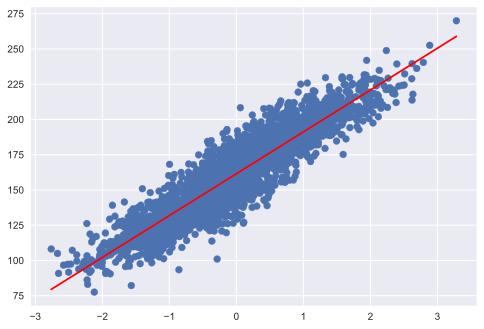

In [67]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, 'r')